In [40]:
#Importing Libraries Needed
import numpy as np
import pandas as pd
import os
import gc
import warnings
warnings.filterwarnings("ignore") # ignore python warnings of deprecation

df = pd.read_csv('../lending-club-loan-data/loan.csv', na_values=['#NAME?']) # '#NAME?' in the datafile will be converted to NaN

In [41]:
df.shape

(887379, 74)

In [42]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [44]:
#Removing features which has got null values above 75%
nulls = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['null_percent'])
drop_cols = nulls[nulls['null_percent']>75.0].index
df.drop(drop_cols, axis=1, inplace=True)

In [45]:
df.shape

(887379, 54)

In [46]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [47]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [48]:
# Check missing values count and percent
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(54)

,Total,Percent
mths_since_last_delinq,454312,51.197065
next_pymnt_d,252971,28.507661
tot_cur_bal,70276,7.919502
total_rev_hi_lim,70276,7.919502
tot_coll_amt,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
title,152,0.017129


In [49]:
df['member_id'].value_counts().head(5)

58732538    1
353782      1
56268296    1
59631955    1
73070084    1
Name: member_id, dtype: int64

In [50]:
# Any variable having missing values more than 50 percent are removed
df.drop([
         "emp_length", "next_pymnt_d", "last_pymnt_d", "mths_since_last_delinq",
         "revol_util", "collections_12_mths_ex_med","last_credit_pull_d",
         "earliest_cr_line","open_acc", "revol_util","pub_rec", "revol_bal", "funded_amnt",             
         "total_rev_hi_lim","emp_length", "emp_title", "tot_cur_bal" , "tot_coll_amt"], axis=1,
           inplace=True)



# Delete unwanted columns
df.drop(["id", "member_id","url"], axis=1, inplace=True)

# Payment plan has all the values "n" and only 3 values "y" so it is not important
df.drop(["pymnt_plan"], axis=1, inplace=True)

# Since we have both address state and zip code let's drop zip code and use address state only
df.drop(["zip_code"], axis=1, inplace=True)

# Title is not important instead we will use "purpose" variable
df.drop(["title"], axis=1, inplace=True)

# The grade is implied by the subgrade, so let's drop the grade column.
#df.drop(["grade"], axis=1, inplace=True)

In [51]:
df.shape

(887379, 32)

In [52]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq'],
      dtype='object')

In [53]:
df.drop(["installment",        
"issue_d",       
"out_prncp" ,       
"out_prncp_inv",        
"total_rec_prncp",       
"total_rec_int",        
"total_rec_prncp",       
"total_rec_int",        
"total_rec_late_fee",       
"recoveries",        
"collection_recovery_fee",        
"last_pymnt_amnt",        
"policy_code",        
"application_type",       
"acc_now_delinq",        
"out_prncp",        
"out_prncp_inv",       
"initial_list_status"], axis=1, inplace=True)

In [54]:
df.drop([ "grade", "verification_status"], axis=1, inplace = True)

In [55]:
df.shape

(887379, 16)

In [56]:
#Let's see the data shape and NaN values
print(df.shape)
print(type(df))
print(df.head())
print(df.isnull().sum())
print(df.isnull().sum().value_counts())

(887379, 16)
<class 'pandas.core.frame.DataFrame'>
   loan_amnt  funded_amnt_inv        term  int_rate sub_grade home_ownership  \
0     5000.0           4975.0   36 months     10.65        B2           RENT   
1     2500.0           2500.0   60 months     15.27        C4           RENT   
2     2400.0           2400.0   36 months     15.96        C5           RENT   
3    10000.0          10000.0   36 months     13.49        C1           RENT   
4     3000.0           3000.0   60 months     12.69        B5           RENT   

   annual_inc  loan_status         purpose addr_state    dti  delinq_2yrs  \
0     24000.0   Fully Paid     credit_card         AZ  27.65          0.0   
1     30000.0  Charged Off             car         GA   1.00          0.0   
2     12252.0   Fully Paid  small_business         IL   8.72          0.0   
3     49200.0   Fully Paid           other         CA  20.00          0.0   
4     80000.0      Current           other         OR  17.94          0.0   

   in

In [69]:
df.to_csv(r'C:\Users\Admin\Desktop\Data Science Methods and Tools\lending-club-loan-data\loan_preproccesed.csv', index = None, header=True)

In [57]:
#Filling the numeric columns with missing values by mean
for cols in df.columns:
    if df[cols].isnull().sum() != 0:
        df[cols].fillna((df[cols].mean()), inplace=True)
        
df.isnull().sum()

loan_amnt          0
funded_amnt_inv    0
term               0
int_rate           0
sub_grade          0
home_ownership     0
annual_inc         0
loan_status        0
purpose            0
addr_state         0
dti                0
delinq_2yrs        0
inq_last_6mths     0
total_acc          0
total_pymnt        0
total_pymnt_inv    0
dtype: int64

In [71]:
df.to_csv(r'C:\Users\Admin\Desktop\Data Science Methods and Tools\lending-club-loan-data\loan_prep.csv', index = None, header=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 16 columns):
loan_amnt          887379 non-null float64
funded_amnt_inv    887379 non-null float64
term               887379 non-null object
int_rate           887379 non-null float64
sub_grade          887379 non-null object
home_ownership     887379 non-null object
annual_inc         887379 non-null float64
loan_status        887379 non-null object
purpose            887379 non-null object
addr_state         887379 non-null object
dti                887379 non-null float64
delinq_2yrs        887379 non-null float64
inq_last_6mths     887379 non-null float64
total_acc          887379 non-null float64
total_pymnt        887379 non-null float64
total_pymnt_inv    887379 non-null float64
dtypes: float64(10), object(6)
memory usage: 108.3+ MB


In [25]:
#Checking for object columns
print(df.select_dtypes(['object']).columns)

Index(['term', 'sub_grade', 'home_ownership', 'loan_status', 'purpose',
       'addr_state'],
      dtype='object')


In [26]:
obj_cats = ['term', 'sub_grade', 'home_ownership',
       'loan_status', 'purpose', 'addr_state']

In [22]:
#Converting the object datatype of columns to category except date as it is datetime object
for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 16 columns):
loan_amnt          887379 non-null float64
funded_amnt_inv    887379 non-null float64
term               887379 non-null object
int_rate           887379 non-null float64
sub_grade          887379 non-null object
home_ownership     887379 non-null object
annual_inc         887379 non-null float64
loan_status        887379 non-null object
purpose            887379 non-null object
addr_state         887379 non-null object
dti                887379 non-null float64
delinq_2yrs        887379 non-null float64
inq_last_6mths     887379 non-null float64
total_acc          887379 non-null float64
total_pymnt        887379 non-null float64
total_pymnt_inv    887379 non-null float64
dtypes: float64(10), object(6)
memory usage: 108.3+ MB


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Variable Correlation')

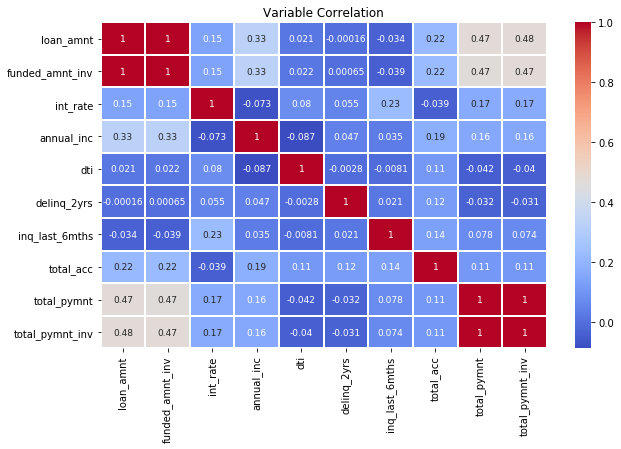

In [60]:
# We will look at the correlation between variables
new_df = df
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Heatmap tells us that correlation between id and member_id is very high so we will remove member_id. And, also the correlation between loan_amnt and funded_amnt_inv is very high so we will remove loan_amnt. the correlation between total_pymnt and total_pymnt_inv is very high so we will remove total_payment.

In [61]:
df.drop(['loan_amnt', 'total_pymnt'], axis=1, inplace=True)

In [62]:
df.head()

,funded_amnt_inv,term,int_rate,sub_grade,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,total_acc,total_pymnt_inv
0,4975.0,36 months,10.65,B2,RENT,24000.0,Fully Paid,credit_card,AZ,27.65,0.0,1.0,9.0,5831.78
1,2500.0,60 months,15.27,C4,RENT,30000.0,Charged Off,car,GA,1.00,0.0,5.0,4.0,1008.71
2,2400.0,36 months,15.96,C5,RENT,12252.0,Fully Paid,small_business,IL,8.72,0.0,2.0,10.0,3003.65
3,10000.0,36 months,13.49,C1,RENT,49200.0,Fully Paid,other,CA,20.00,0.0,1.0,37.0,12226.30
4,3000.0,60 months,12.69,B5,RENT,80000.0,Current,other,OR,17.94,0.0,0.0,38.0,3242.17


In [77]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
df.head()

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,total_acc,total_pymnt,total_pymnt_inv
0,1077501,1296599,5000.0,4975.0,36 months,10.65,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,1.0,9.0,5861.071414,5831.78
1,1077430,1314167,2500.0,2500.0,60 months,15.27,C,C4,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,5.0,4.0,1008.710000,1008.71
2,1077175,1313524,2400.0,2400.0,36 months,15.96,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2.0,10.0,3003.653644,3003.65
3,1076863,1277178,10000.0,10000.0,36 months,13.49,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,1.0,37.0,12226.302212,12226.30
4,1075358,1311748,3000.0,3000.0,60 months,12.69,B,B5,RENT,80000.0,Source Verified,Current,other,OR,17.94,0.0,0.0,38.0,3242.170000,3242.17


In [63]:
df_term = pd.get_dummies(df['term'])
df_grade = pd.get_dummies(df['sub_grade'])
df_homeowner = pd.get_dummies(df['home_ownership'])
df_purp = pd.get_dummies(df['purpose'])
df_loan = pd.get_dummies(df['loan_status'])
df_address = pd.get_dummies(df['addr_state'])
df_newone = pd.concat([df, df_term, df_grade, df_homeowner, df_purp,df_loan, df_address ], axis =1)
df_newone

,funded_amnt_inv,term,int_rate,sub_grade,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4975.000000,36 months,10.65,B2,RENT,24000.00,Fully Paid,credit_card,AZ,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.000000,60 months,15.27,C4,RENT,30000.00,Charged Off,car,GA,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.000000,36 months,15.96,C5,RENT,12252.00,Fully Paid,small_business,IL,8.72,...,0,0,0,0,0,0,0,0,0,0
3,10000.000000,36 months,13.49,C1,RENT,49200.00,Fully Paid,other,CA,20.00,...,0,0,0,0,0,0,0,0,0,0
4,3000.000000,60 months,12.69,B5,RENT,80000.00,Current,other,OR,17.94,...,0,0,0,0,0,0,0,0,0,0
5,5000.000000,36 months,7.90,A4,RENT,36000.00,Fully Paid,wedding,AZ,11.20,...,0,0,0,0,0,0,0,0,0,0
6,7000.000000,60 months,15.96,C5,RENT,47004.00,Current,debt_consolidation,NC,23.51,...,0,0,0,0,0,0,0,0,0,0
7,3000.000000,36 months,18.64,E1,RENT,48000.00,Fully Paid,car,CA,5.35,...,0,0,0,0,0,0,0,0,0,0
8,5600.000000,60 months,21.28,F2,OWN,40000.00,Charged Off,small_business,CA,5.55,...,0,0,0,0,0,0,0,0,0,0
9,5350.000000,60 months,12.69,B5,RENT,15000.00,Charged Off,other,TX,18.08,...,0,0,1,0,0,0,0,0,0,0


In [64]:
df_newone.shape

(887379, 132)

In [65]:
df_newone.drop(['term', 'sub_grade' , 'home_ownership', 'loan_status', 'purpose', 'addr_state'], inplace=True, axis=1)

In [66]:
df_newone.shape

(887379, 126)

In [68]:
df_newone.to_csv(r'C:\Users\Admin\Desktop\Data Science Methods and Tools\lending-club-loan-data\loan_cleaned.csv', index = None, header=True)

In [69]:
df_newone.head(5)
intRate=df_newone['int_rate']
print(df_newone.shape,'Bfore deleting column')
del df_newone['int_rate']
print(df_newone.shape,'after deng column')
df_newone['int_rate']=intRate
print(df_newone.shape,'after adding column')
X = df_newone.iloc[:, :-1].values
print(X.shape,'after slicing column')
y = df_newone.iloc[:, -1:].values
print(y.shape,'after last  column')
print(y)

(887379, 126) Bfore deleting column
(887379, 125) after deng column
(887379, 126) after adding column
(887379, 125) after slicing column
(887379, 1) after last  column
[[10.65]
 [15.27]
 [15.96]
 ...
 [15.99]
 [19.99]
 [11.99]]


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [70]:
#Splitting the dataset into Training and Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [71]:
from sklearn.linear_model import LinearRegression
#Fitting Simple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Predicting the Test set result
y_pred = regressor.predict(X_test)

In [72]:
print(y_pred[0:5])

[[ 8.92440162]
 [ 6.57415783]
 [ 9.27764902]
 [12.26377376]
 [14.05672693]]


In [41]:
print(y_test[0:5])

[[ 9.17]
 [ 5.99]
 [10.16]
 [12.99]
 [14.64]]


In [118]:
import matplotlib.pyplot as plt

In [73]:
#Mean Absolute Percentage Error for Linear Regression Model
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [74]:
#Calling the function
mean_absolute_percentage_error(y_test, y_pred)

3.9232877059084412

In [40]:
#k = 5 fold cross validation for Linear Regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = regressor,X =  X_train, y = y_train, cv=5)

In [43]:
#Average of all the folds and prediction the accuracy
scores.mean()

0.9724744967042387

In [44]:
#Standard Deviation Calculation
scores.std()

0.00017648873901682843

Reference Links : https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
 https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9 